## Access Satellite Net Primary Productivity OC3 1Day Aqua data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_net_primary_productivity_oc3_1day_aqua dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/b35b829c-9149-46c6-9e25-d0fd03463280).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_net_primary_productivity_oc3_1day_aqua.ipynb).

In [1]:
dataset_name = "satellite_net_primary_productivity_oc3_1day_aqua"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 240 packages in 31ms


✅ Local version 0.2.1 is up to date (remote: 0.2.1)


In [3]:
from DataQuery import GetAodn

# Understanding the Dataset

In [4]:
# remote zarr dataset
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 575 ms, sys: 75.6 ms, total: 651 ms
Wall time: 1.23 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	latitude = 7001 ;
	longitude = 10001 ;
	time = 8041 ;

variables:
	float64 latitude(latitude) ;
		latitude:axis = Y ;
		latitude:long_name = latitude ;
		latitude:standard_name = latitude ;
		latitude:units = degrees_north ;
	float64 longitude(longitude) ;
		longitude:axis = X ;
		longitude:long_name = longitude ;
		longitude:standard_name = longitude ;
		longitude:units = degrees_east ;
	float64 npp_vgpm_eppley_oc3(time, latitude, longitude) ;
		npp_vgpm_eppley_oc3:flag_applied = HISATZEN LAND CLDICE NAVFAIL ;
		npp_vgpm_eppley_oc3:long_name = MODIS_Epply_VGPM Net Primary Productivity using chl_oc3 ;
		npp_vgpm_eppley_oc3:units = mg.m^-3.d^-1 ;
	datetime64[ns] time(time) ;
		time:axis = T ;
		time:long_name = time ;
		time:standard_name = time ;

// global attributes:
	:Conventions = CF-1.6 ;
	:description_url = http://www.science.oregonstate.edu/ocean.productivity/eppley.model.php ;
	:history = File initialised at 2024-09-10T06:51:07.710308
Initialised v

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2002-07-04 05:30:00'), Timestamp('2024-12-06 05:30:00'))

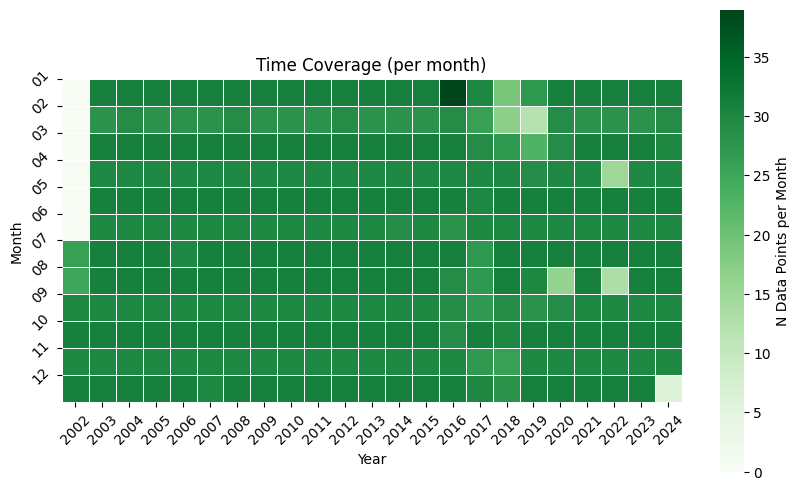

In [7]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

In [8]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='npp_vgpm_eppley_oc3', 
                                                  lat=-43, 
                                                  lon=155, 
                                                  date_start='2007-12-01', 
                                                  date_end='2009-12-31', 
                                                  lon_name_override="longitude", 
                                                  lat_name_override="latitude")

CPU times: user 1.83 s, sys: 242 ms, total: 2.08 s
Wall time: 4.77 s


In [9]:
time_series_df

,time,npp_vgpm_eppley_oc3,latitude,longitude
0,2007-12-01 05:30:00,NaN,-43.0,155.0
1,2007-12-03 05:30:00,422.706146,-43.0,155.0
2,2007-12-04 05:30:00,NaN,-43.0,155.0
3,2007-12-05 05:30:00,NaN,-43.0,155.0
4,2007-12-06 05:30:00,NaN,-43.0,155.0
...,...,...,...,...
755,2009-12-26 05:30:00,677.481567,-43.0,155.0
756,2009-12-27 05:30:00,NaN,-43.0,155.0
757,2009-12-28 05:30:00,572.163086,-43.0,155.0
758,2009-12-29 05:30:00,NaN,-43.0,155.0


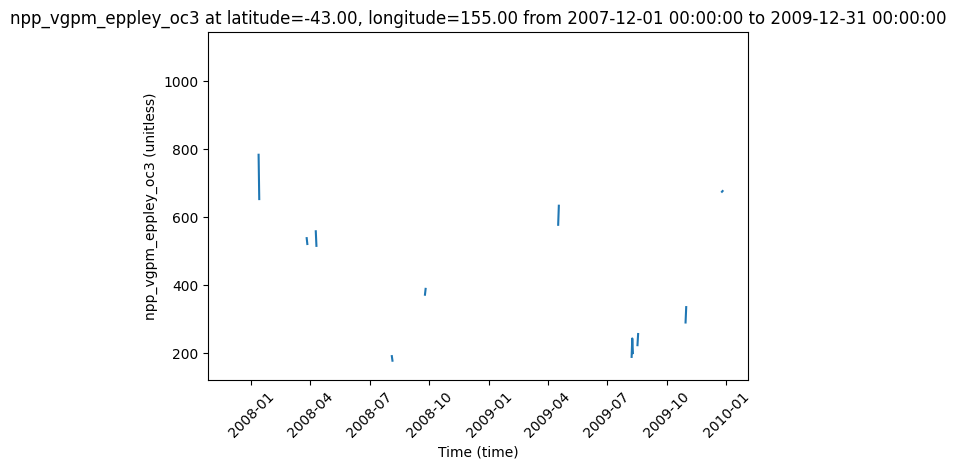

CPU times: user 1.51 s, sys: 270 ms, total: 1.78 s
Wall time: 4.36 s


In [10]:
%%time
time_series_df = aodn_dataset.plot_timeseries(var_name='npp_vgpm_eppley_oc3', 
                                              lat=-43, 
                                              lon=155, 
                                              date_start='2007-12-01', 
                                              date_end='2009-12-31', 
                                              lon_name_override="longitude", 
                                              lat_name_override="latitude")

## Plot a gridded variable

2025-06-10 16:48:43,245 - aodn.GetAodn - INFO - Plotting 'MODIS_Epply_VGPM Net Primary Productivity using chl_oc3' for 6 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2525: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


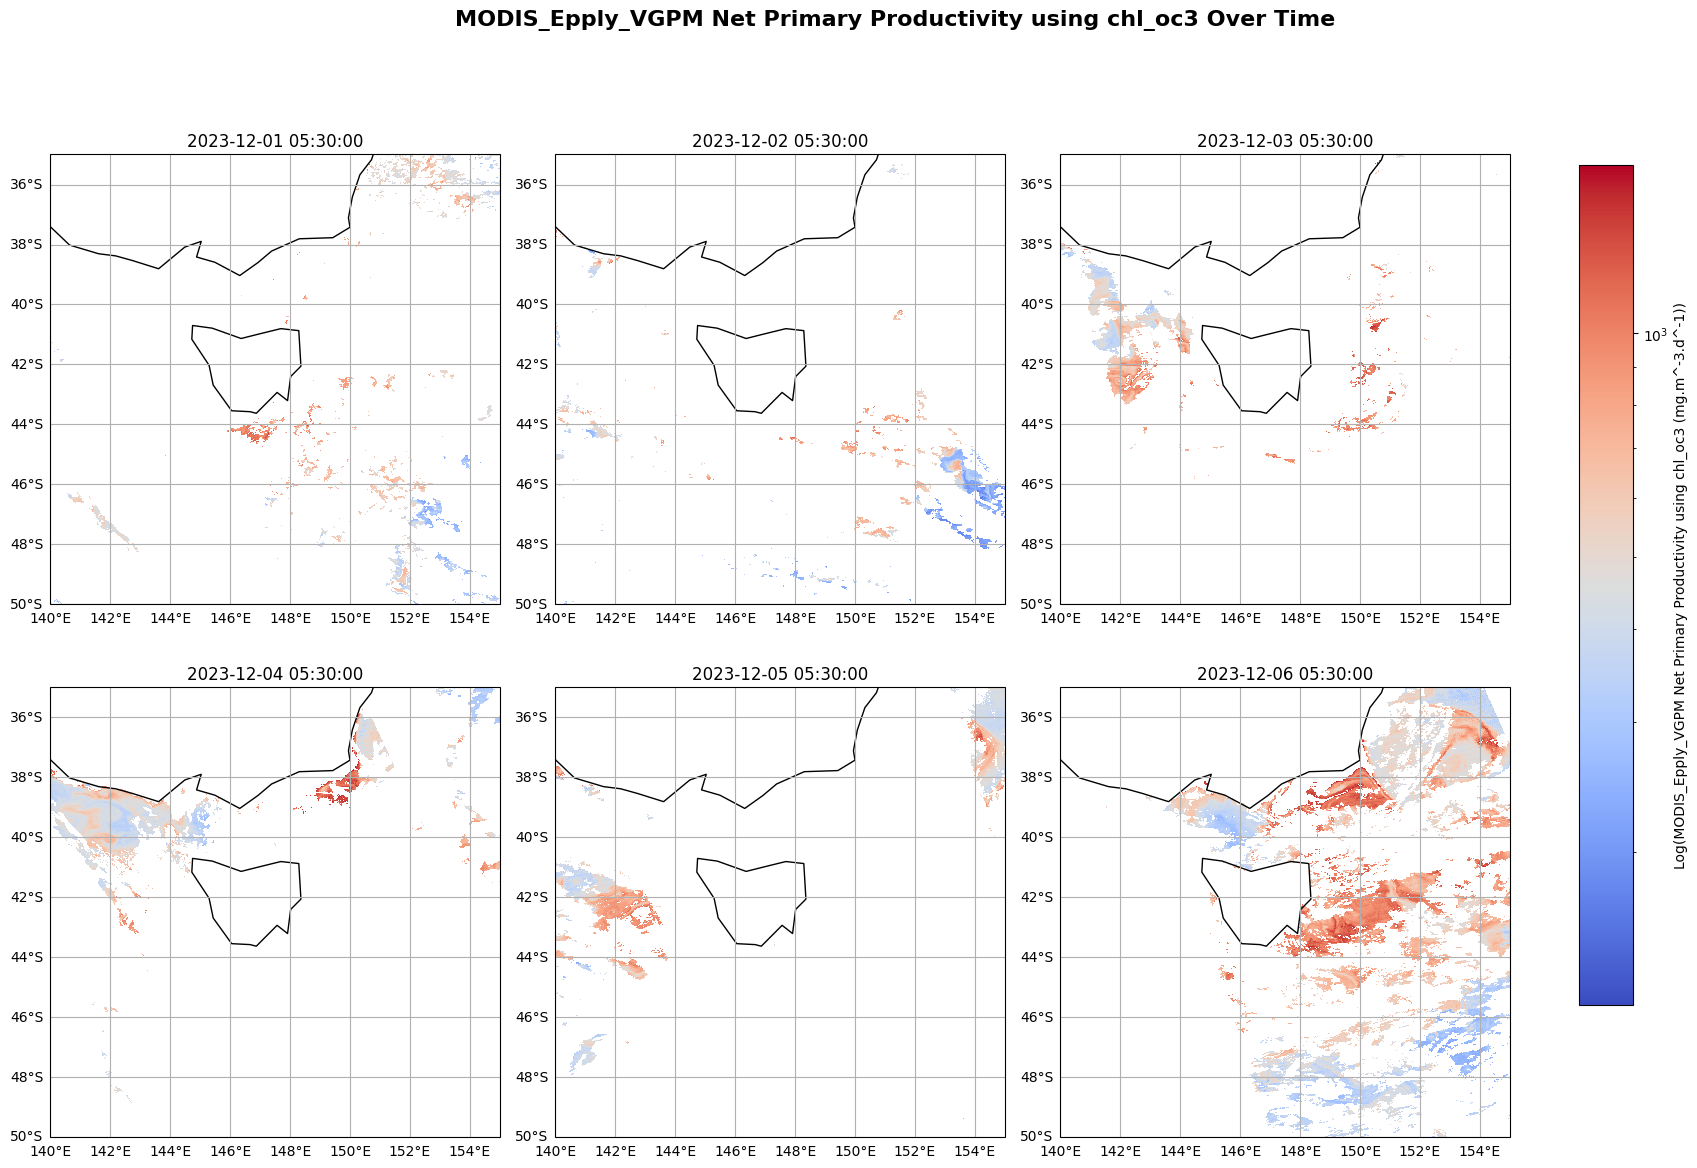

CPU times: user 7.7 s, sys: 3.8 s, total: 11.5 s
Wall time: 9.18 s


In [11]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='npp_vgpm_eppley_oc3', 
                                                    date_start='2023-12-01',                                                
                                                    lon_name_override="longitude", 
                                                    lat_name_override="latitude", 
                                                    lon_slice=(140, 155), 
                                                    lat_slice=(-50, -35), 
                                                    n_days=6, 
                                                    coastline_resolution="110m", 
                                                    log_scale=True)